<a href="https://colab.research.google.com/github/vinthegreat84/ML-Lab/blob/main/02_Classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# load the data
link = 'https://raw.githubusercontent.com/vinthegreat84/ML-Lab/main/data/rock%20type.csv'
data = pd.read_csv(link)
data.head()

,SAMPLE ID,SIO2,TIO2,AL2O3,MNO,MGO,CAO,NA2O,K2O,P2O5,class
0,ME4,81.10,0.710,7.50,0.080,1.10,0.72,0.86,1.890,0.030,clay
1,"91-596-1.2,68-71",52.77,0.842,14.67,1.242,3.29,2.40,4.33,3.579,1.200,clay
2,17-Mar,43.73,2.060,15.90,0.170,10.03,4.57,1.39,1.520,0.160,clay
3,ME5,84.90,0.330,5.40,0.030,0.27,2.00,0.07,1.630,0.020,clay
4,V14-55,65.91,0.614,11.08,0.152,2.42,4.03,3.41,1.140,0.082,clay


In [6]:
# Summary Statistics
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SIO2,3451.0,63.073841,13.565847,1.74,56.95,64.50,71.155,98.40
TIO2,3451.0,0.625041,0.395386,0.02,0.42,0.58,0.750,4.14
AL2O3,3451.0,11.909273,4.259257,0.45,9.30,12.50,14.700,28.30
MNO,3451.0,0.116125,0.350854,0.00,0.04,0.07,0.110,9.69
MGO,3451.0,2.377810,2.245045,0.04,1.10,1.90,2.885,23.90
CAO,3451.0,5.057054,6.969694,0.00,0.88,2.47,6.205,63.28
NA2O,3451.0,1.741008,1.351626,0.00,0.60,1.48,2.660,12.20
K2O,3451.0,2.186565,1.481162,0.00,1.24,1.92,2.770,13.80
P2O5,3451.0,0.524640,2.523379,0.00,0.10,0.14,0.200,31.70


Accuracy: 0.6772793053545586
Confusion Matrix: [[ 22  16  16   7]
 [  6 347  20  39]
 [  6  30  33  16]
 [ 10  41  16  66]]


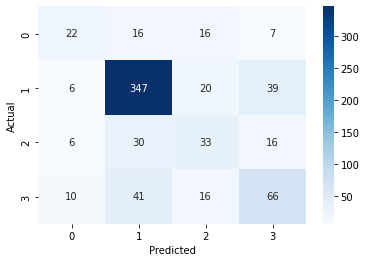

In [7]:
# split the data into features and target
X = data.drop(columns=['class', 'SAMPLE ID'])
y = data['class']

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# fit the classifier to the training data
clf.fit(X_train, y_train)

# make predictions on the test set
y_pred = clf.predict(X_test)

# evaluate the model
acc = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("Confusion Matrix:", conf_mat)

# plot the confusion matrix
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()